In [45]:
import pandas as pd
import numpy as np
import anndata as ad
import sgkit as sg
import cellink  as cl
from pathlib import Path
import matplotlib.pyplot as plt
import pickle

In [2]:
from cellink.io import read_sgkit_zarr

In [3]:
id_col = "#Uploaded_variation"

In [4]:
zarr_file_path = "/data/ouga/home/ag_gagneur/hoev/s_deeprvat/eva/theislab/hackathon24/chr22.dose.filtered.R2_0.8.vcz"
#genotype zarr file

## Load data as zarr file 

In [5]:
gdata = read_sgkit_zarr(zarr_file_path)
gdata

AnnData object with n_obs × n_vars = 1034 × 143083
    obs: 'id'
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    varm: 'filter'

## Write variants to VCF for annotation 

In [6]:
cl.tl.write_variants_to_vcf(gdata, out_file="variants.vcf")

[2024-10-09 22:12:55,803] INFO:cellink.tl._annotate_snps_genotype_data: number of variants to annotate: 143083
[2024-10-09 22:12:55,803] INFO:cellink.tl._annotate_snps_genotype_data: Writing variants to variants.vcf


## Annotate variants

### Using VEP 

### run VEP

In [7]:
anno_file = "variant_vep_annotated.txt"
config_file  = "../docs/example/config.yaml"


In [8]:
# cl.tl.run_vep(config_file,
#              input_vcf="variants.vcf",
#              output=anno_file) #writes "variant_vep_annotated.txt"


### process VEP annos

In [9]:
%%time
gdata = cl.tl.add_vep_annos_to_gdata(anno_file, gdata,
                                    id_col = "#Uploaded_variation",
                             cols_to_explode=["Consequence"],
                             cols_to_dummy=["Consequence"])
gdata

[2024-10-09 22:12:56,605] INFO:cellink.tl._annotate_snps_genotype_data: Index(['#Uploaded_variation', 'Location', 'Allele', 'Gene', 'Feature',
       'Feature_type', 'Consequence', 'cDNA_position', 'CDS_position',
       'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation',
       'IMPACT', 'DISTANCE', 'STRAND', 'FLAGS', 'BIOTYPE', 'CANONICAL', 'ENSP',
       'SIFT', 'PolyPhen', 'gnomADe_AF', 'gnomADe_AFR_AF', 'gnomADe_AMR_AF',
       'gnomADe_ASJ_AF', 'gnomADe_EAS_AF', 'gnomADe_FIN_AF', 'gnomADe_NFE_AF',
       'gnomADe_OTH_AF', 'gnomADe_SAS_AF', 'CLIN_SIG', 'SOMATIC', 'PHENO',
       'CADD_PHRED', 'CADD_RAW', 'TSSDistance'],
      dtype='object')
[2024-10-09 22:12:56,930] INFO:cellink.tl.utils: Exploding column Consequence
[2024-10-09 22:12:57,555] INFO:cellink.tl.utils: Number of original rows: 182552.
 Number of exploded rows: 200116
[2024-10-09 22:12:57,567] INFO:cellink.tl.utils: Making dummies from column Consequence
[2024-10-09 22:12:57,907] INFO:cellink.tl._annota

AnnData object with n_obs × n_vars = 1034 × 143083
    obs: 'id'
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    varm: 'annotations_0', 'annotations_1', 'annotations_2', 'annotations_3', 'annotations_4', 'annotations_5', 'annotations_6', 'annotations_7'

In [10]:
gdata

AnnData object with n_obs × n_vars = 1034 × 143083
    obs: 'id'
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    varm: 'annotations_0', 'annotations_1', 'annotations_2', 'annotations_3', 'annotations_4', 'annotations_5', 'annotations_6', 'annotations_7'

In [11]:
gdata.write("gdata.h5ad")

... storing 'chrom' as categorical
... storing 'a0' as categorical
... storing 'a1' as categorical
... storing 'id' as categorical


## Load data 

In [2]:
gdata = ad.read_h5ad("gdata.h5ad")
gdata

AnnData object with n_obs × n_vars = 1034 × 143083
    obs: 'id'
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    varm: 'annotations_0', 'annotations_1', 'annotations_2', 'annotations_3', 'annotations_4', 'annotations_5', 'annotations_6', 'annotations_7'

## Explore/Plot annotations

In [3]:
anno = gdata.var.join(gdata.varm["annotations_0"])

### histogram for any annotation


In [43]:
anno.columns

Index(['chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id',
       'id_mask', 'quality', 'gnomADe_AF', 'gnomADe_EAS_AF', 'CADD_RAW',
       'gnomADe_OTH_AF', 'PHENO', 'gnomADe_AFR_AF', 'CADD_PHRED',
       'Consequence_start_lost', 'gnomADe_ASJ_AF', 'Existing_variation',
       'Location', 'gnomADe_FIN_AF', 'gnomADe_SAS_AF', 'gnomADe_NFE_AF',
       'Feature_type', 'Consequence_intergenic_variant', 'Allele',
       'gnomADe_AMR_AF', 'CLIN_SIG', 'SOMATIC', 'Gene', 'Feature',
       'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids',
       'Codons', 'IMPACT', 'DISTANCE', 'STRAND', 'FLAGS', 'BIOTYPE',
       'CANONICAL', 'ENSP', 'SIFT', 'PolyPhen', 'TSSDistance',
       'Consequence_3_prime_UTR_variant', 'Consequence_5_prime_UTR_variant',
       'Consequence_NMD_transcript_variant',
       'Consequence_coding_sequence_variant',
       'Consequence_downstream_gene_variant',
       'Consequence_incomplete_terminal_codon_variant',
       'Consequence_intron_

Text(0.5, 0, 'MAF')

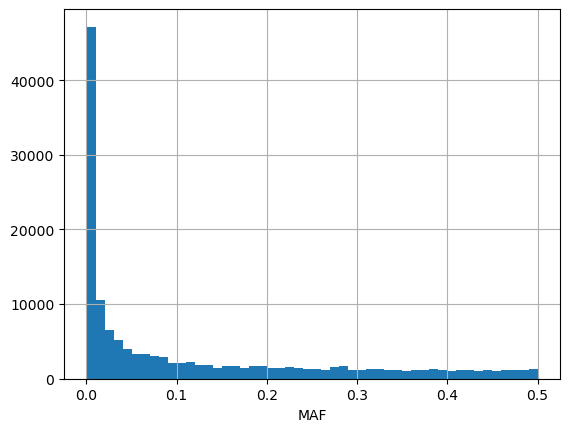

In [59]:
anno['maf'].hist(bins = 50)
plt.xlabel("MAF")

<Axes: >

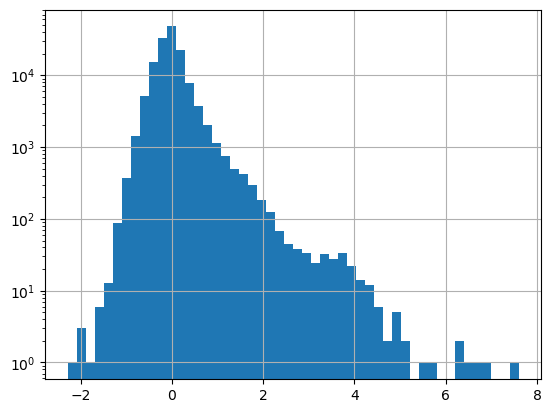

In [34]:
anno['CADD_RAW'].hist(bins = 50, log = True)

In [4]:
anno_c = anno[[c for c in anno.columns if "Conseq" in c]]


Text(0.5, 0, 'TSSDistance')

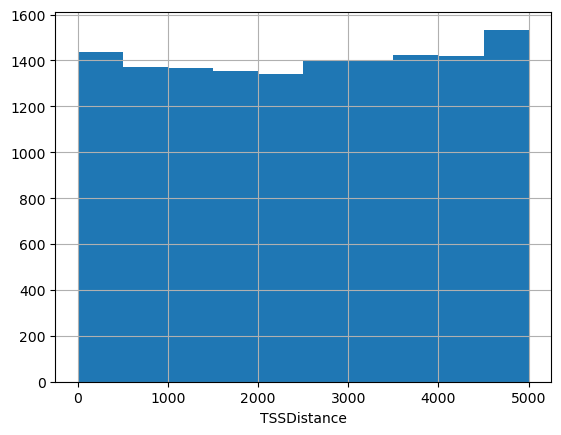

In [55]:
anno["TSSDistance"].dropna().hist()
plt.xlabel("TSSDistance")

Text(0.5, 0, 'Unique Variants per Gene')

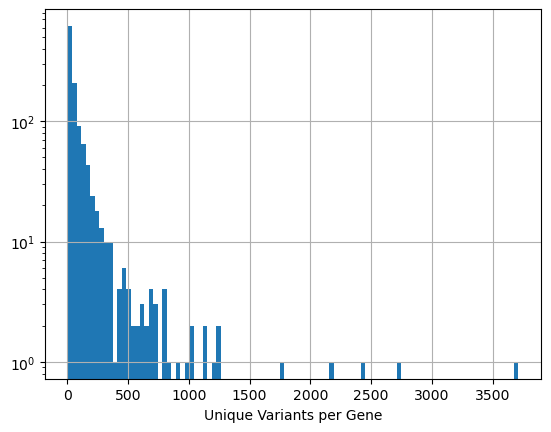

In [57]:
anno.query("Gene != '-'").groupby("Gene").size().hist(log = True, bins = 100)
plt.xlabel("Unique Variants per Gene")

In [25]:
c_counts = anno_c.multiply(anno["maf"]* 2 * gdata.n_obs, axis=0)\
    .sum(axis = 0).to_frame(name = "count").reset_index(names = ["Consquence"])
c_counts["Consquence"] = c_counts["Consquence"].str.replace("Consequence_", "")
c_counts

,Consquence,count
0,start_lost,2.267562e+02
1,intergenic_variant,9.156695e+06
2,3_prime_UTR_variant,4.249849e+05
3,5_prime_UTR_variant,6.094204e+04
4,NMD_transcript_variant,0.000000e+00
5,coding_sequence_variant,0.000000e+00
6,downstream_gene_variant,3.536837e+06
7,incomplete_terminal_codon_variant,8.343760e+02
8,intron_variant,1.838194e+07
9,mature_miRNA_variant,1.712097e+02


<Axes: xlabel='Consquence'>

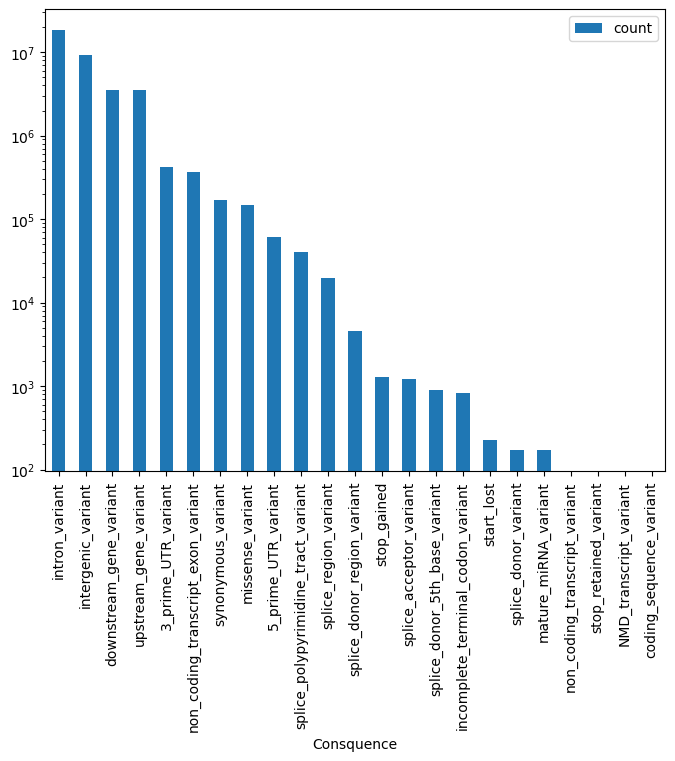

In [30]:
c_counts.set_index("Consquence").sort_values("count", ascending = False)\
    .plot(kind='bar', figsize=(8, 6), log = True)

In [20]:
anno["IMPACT"].unique()

array(['MODIFIER', 'MODERATE', 'LOW', 'HIGH'], dtype=object)

In [61]:
vars_to_keep = anno[anno["IMPACT"] == "HIGH"].index

In [80]:
high_impact_count = pd.Series(gdata[:, gdata.var_names.isin(vars_to_keep)].X.sum(axis = 1))
high_impact_count.index = gdata.obs.index
high_impact_count.index[high_impact_count.argmax()]

'11'

<Axes: >

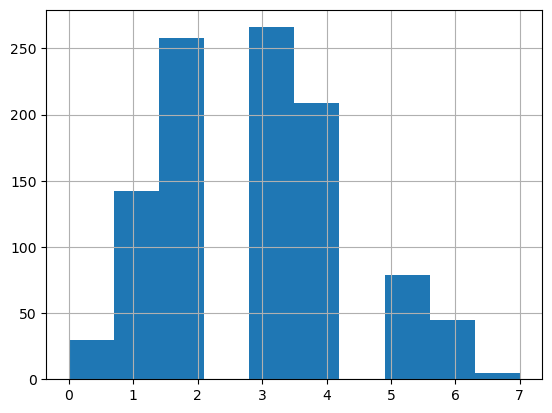

In [81]:
high_impact_count.hist()